In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/income/income


In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("/kaggle/input/income/income")

In [4]:
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [5]:
df.drop("Name",axis=1,inplace=True)

In [6]:
df

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [8]:
df["Age"]=scaler.fit_transform(df[["Age"]])
df["Income($)"]=scaler.fit_transform(df[["Income($)"]])

In [9]:
df

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436
5,0.764706,0.940171
6,0.882353,0.982906
7,0.705882,1.000000
8,0.588235,0.948718
9,0.529412,0.726496


In [10]:
from sklearn.cluster import KMeans

In [11]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Income($)'>

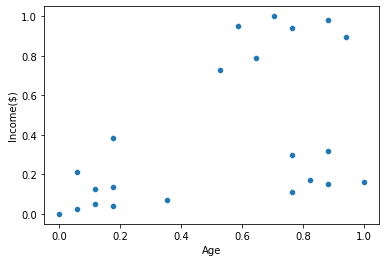

In [12]:
sns.scatterplot(x=df["Age"],y=df["Income($)"])

In [13]:
distortions=[]
rng=range(1,10)
for i in rng:
    km=KMeans(n_clusters=i)
    km.fit(df)
    distortions.append(km.inertia_)

<AxesSubplot:>

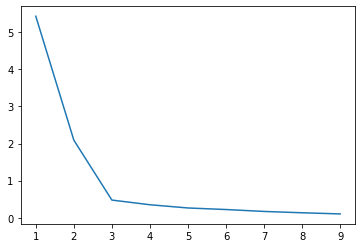

In [14]:
sns.lineplot(x=rng,y=distortions)

In [15]:
km=KMeans(n_clusters=3)
df["cluster"]=km.fit_predict(df)
df

,Age,Income($),cluster
0,0.058824,0.213675,1
1,0.176471,0.384615,1
2,0.176471,0.136752,1
3,0.117647,0.128205,1
4,0.941176,0.897436,0
5,0.764706,0.940171,0
6,0.882353,0.982906,0
7,0.705882,1.000000,0
8,0.588235,0.948718,0
9,0.529412,0.726496,0


<AxesSubplot:xlabel='Age', ylabel='Income($)'>

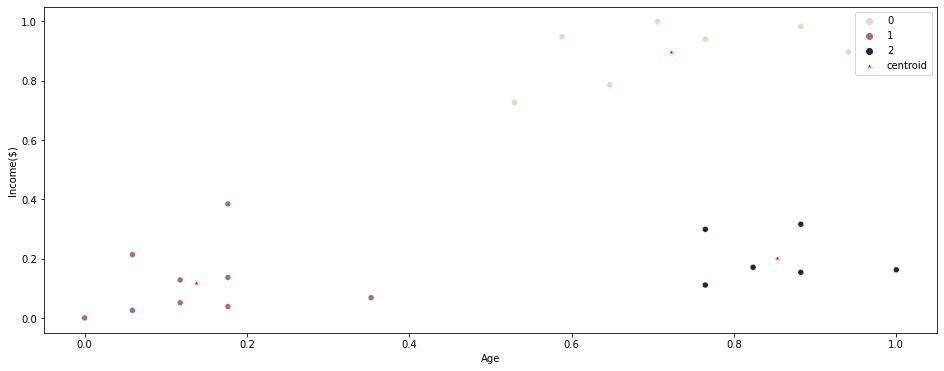

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
sns.scatterplot(x=df["Age"],y=df["Income($)"],hue=df["cluster"])
sns.scatterplot(x=km.cluster_centers_[:,0],y=km.cluster_centers_[:,1],label="centroid",color="red",marker="*")